In [1]:
# importing modules
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading csv file
globuarClusters = pandas.read_csv("LAUNCH43.csv")

In [3]:
# array of distances from globular clusters to sun
timedata = np.array(globuarClusters['Time'].tolist())
counts = np.array(globuarClusters[' Counts'].tolist())
altitude = np.array(globuarClusters[' MPL Altitude (ft)'].tolist()) # meters
pressuredata = np.array(globuarClusters[' Pressure (hPa)'].tolist()) # hpa
rtcTemp = np.array(globuarClusters[' RTC Temperature (C)'].tolist()) # C
mplTemp = np.array(globuarClusters[' MPL Temperature (C)'].tolist()) # C

In [4]:
# converting time array to something we can graph nicely
def get_hours(time_str):
    hh, mm, ss = time_str.split(':')
    return int(hh) + np.divide(int(mm),60) + np.divide(int(ss),3600)

time = np.array(globuarClusters['Time'].tolist())
for i, x in np.ndenumerate(timedata):
    time[i] = get_hours(timedata[i])
    
time = time.astype(float)

In [5]:
# converting pressure from hpa to atm
atmtohpa = 	1013.25
pressure = np.divide(pressuredata,atmtohpa)

In [6]:
# correcting RTC temperatures
correction = np.where(rtcTemp > 200, 256, 0)
rtcTemp = np.subtract(rtcTemp,correction)

In [7]:
# average difference between rtc and mpl temp sensors
tempError = np.round(np.subtract(np.average(rtcTemp),np.average(mplTemp)),5)

In [8]:
# finding minimum pressure
minPressure = np.round(np.min(pressure),5)

In [9]:
#Removing data points after landing
time = time[0:249]
counts = counts[0:249]
altitude = altitude[0:249]
pressure = pressure[0:249]
rtcTemp = rtcTemp[0:249]
mplTemp = mplTemp[0:249]

In [10]:
#Splitting counts into pre and post burst counts
counts1 = np.column_stack((altitude[0:144],counts[0:144]))
counts2 = np.column_stack((altitude[145:249],counts[145:249]))

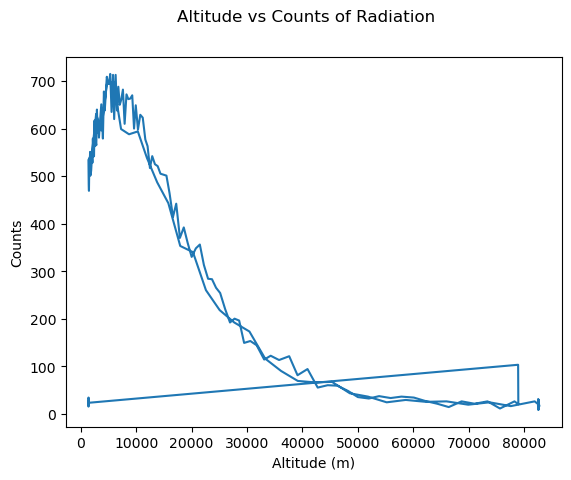

In [11]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
ax1.plot(altitude, counts, color='tab:blue')
plt.suptitle("Altitude vs Counts of Radiation")
plt.ylabel("Counts")
plt.xlabel("Altitude (m)")
plt.show()

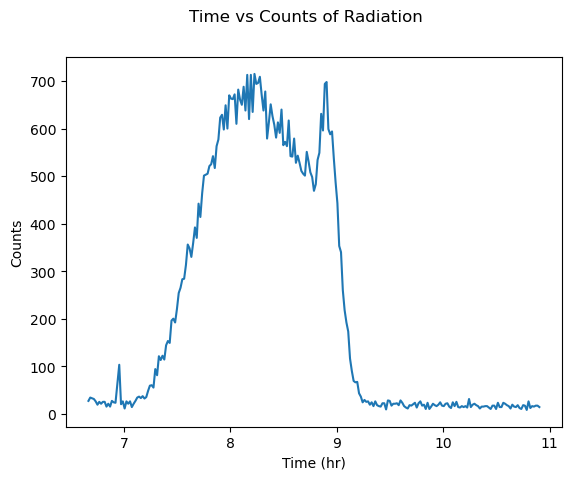

In [12]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
ax2.plot(time, counts, color='tab:blue')
plt.suptitle("Time vs Counts of Radiation")
plt.ylabel("Counts")
plt.xlabel("Time (hr)")
plt.show()

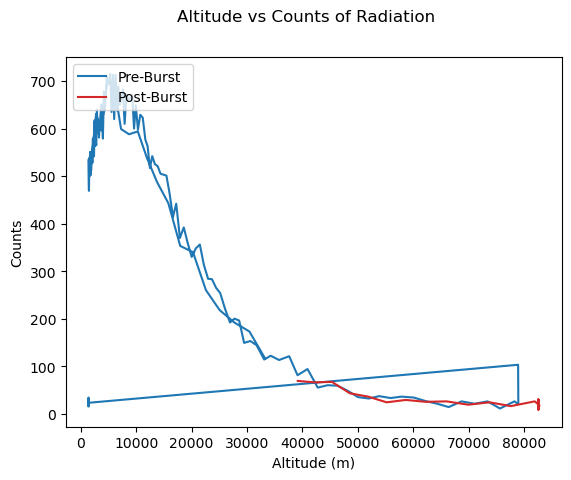

In [13]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
ax1.plot(altitude[0:144], counts[0:144], color='tab:blue')
ax1.plot(altitude[145:249], counts[145:249], color='tab:red')
plt.suptitle("Altitude vs Counts of Radiation")
plt.ylabel("Counts")
plt.xlabel("Altitude (m)")
plt.legend(["Pre-Burst", "Post-Burst"], loc ="upper left")
plt.show()

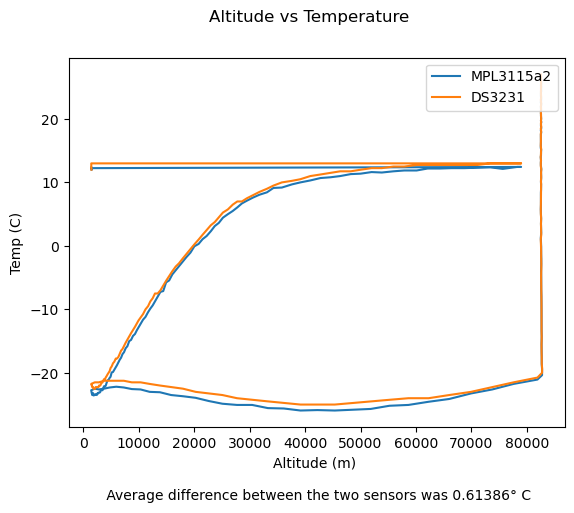

In [14]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(1, 1, 1)
ax3.plot(altitude, mplTemp, color='tab:blue')
ax3.plot(altitude, rtcTemp, color='tab:orange')
plt.suptitle("Altitude vs Temperature")
plt.ylabel("Temp (C)")
plt.xlabel(f'Altitude (m) \n\n Average difference between the two sensors was {tempError}° C')
plt.legend(["MPL3115a2", "DS3231"], loc ="upper right")
plt.show()

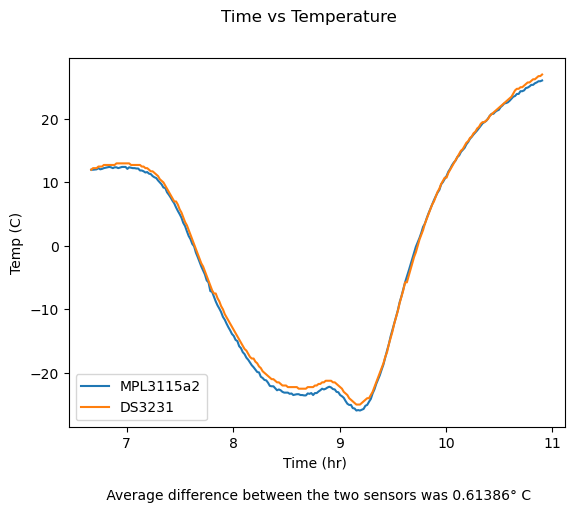

In [15]:
fig4 = plt.figure()
ax4 = fig4.add_subplot(1, 1, 1)
ax4.plot(time, mplTemp, color='tab:blue')
ax4.plot(time, rtcTemp, color='tab:orange')
plt.suptitle("Time vs Temperature")
plt.ylabel("Temp (C)")
plt.xlabel(f'Time (hr) \n\n Average difference between the two sensors was {tempError}° C')
plt.legend(["MPL3115a2", "DS3231"], loc ="lower left")
plt.show()

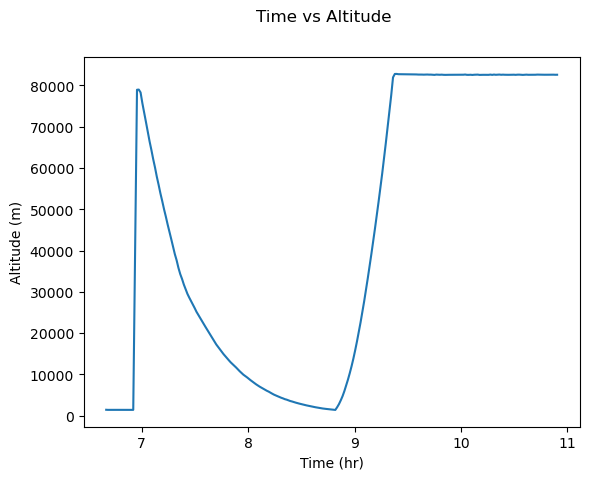

In [16]:
fig5 = plt.figure()
ax5 = fig5.add_subplot(1, 1, 1)
ax5.plot(time, altitude, color='tab:blue')
plt.suptitle("Time vs Altitude")
plt.ylabel("Altitude (m)")
plt.xlabel("Time (hr)")
plt.show()

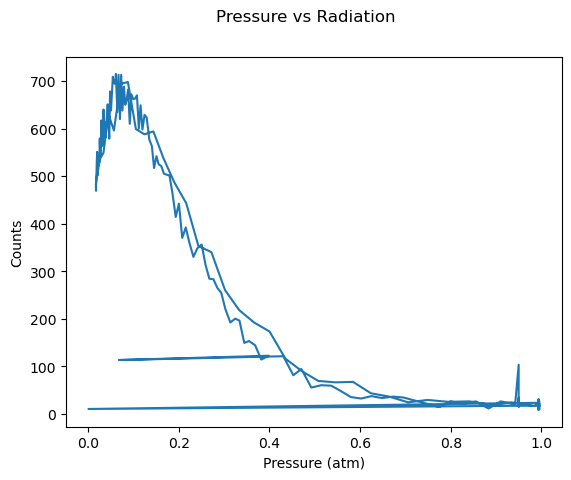

In [17]:
fig100 = plt.figure()
ax6 = fig100.add_subplot(1, 1, 1)
ax6.plot(pressure, counts, color='tab:blue')
plt.suptitle("Pressure vs Radiation")
plt.xlabel("Pressure (atm)")
plt.ylabel("Counts")
plt.show()

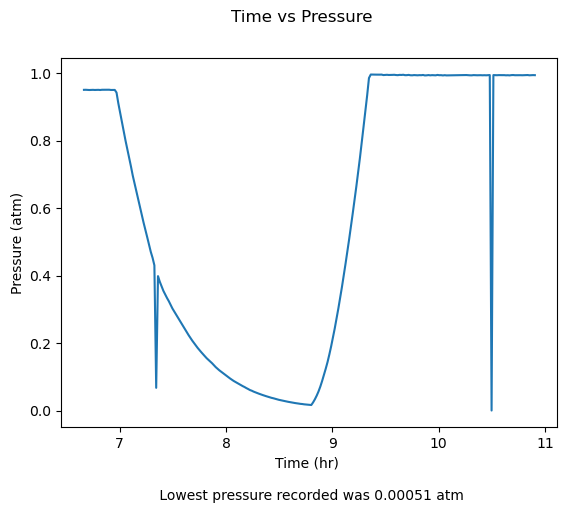

In [18]:
fig7 = plt.figure()
ax7 = fig7.add_subplot(1, 1, 1)
ax7.plot(time, pressure, color='tab:blue')
plt.suptitle("Time vs Pressure")
plt.ylabel("Pressure (atm)")
plt.xlabel(f'Time (hr) \n\n Lowest pressure recorded was {minPressure} atm')
plt.show()